In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

## Introduction to Digital Forensics - Assignment 1

### Tor2Door Darknet Market data analysis



| Name | Student-Nr. |
|------|-------------|
|  Mai Lan Vu    | s1680234    |
|   Benjamin Othmer   | s2554267    |
|  Daniel Mocanu    | s2539748    |
|  Aleksander Petrov   | s2615576    |

### Categories

We will be analyzing the data samples that we collected.

This data was collected from the "tor2door" as located on the dark web.
We accessed the market by creating our own user accounts and the data was collected between the 21.10.22 and 25.10.22

The sales, as found in the data/Sales.csv file have the following columns:
Name, Market Category, Seller, Ranking (Legal/Illegal/Depends) and Reason (for the Ranking)
The data includes 102 Data points

The Vendors, as found in the data/Top_Vendors.csv file have the following columns:
Name, Count
We initially wanted to analyze the top 100 sellers on the website but noticed that there are only a total of 35 Sellers that have >0 sales.
The dataset contains 35 vendors.

In [118]:

data = pd.read_csv('data/Sales.csv', delimiter=';', skiprows=0, low_memory=False)
vendors = pd.read_csv('data/Top_Vendors.csv', delimiter=',', skiprows=0, low_memory=False)
#sales
print(list(data.columns))
print(data.shape)
#vendors
print(list(vendors.columns))
print(vendors.shape)


['Name', 'Market Category', 'Seller', 'Ranking (Legal/Illegal/Depends)', 'Reason']
(103, 5)
['Name', 'Count']
(35, 2)


### Top Vendor Sales distribution
First, we are going to look at the distribution of sales on the platform

As we can see, the biggest volume of sales transactions is being completed by a handful of vendors

,Name,Count,Marketshare
0,DangerousTomato,2243,28.544159
1,heartkidnapper,1626,20.692288
2,HarleyQuinn,791,10.066175
3,rvaska,485,6.172054
4,g3cko,387,4.924917
5,mrq1234,332,4.224994
6,enjoymyaccounts,237,3.016035
7,mysteryland,225,2.863324
8,DrunkDragon,205,2.608806
9,digitalworld,201,2.557903


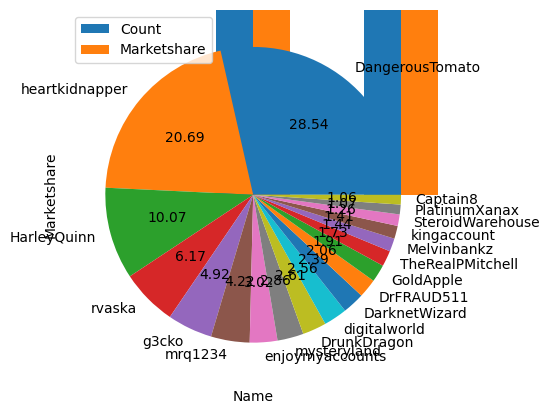

In [159]:
vendors.plot(kind='bar', x='Name', ylabel='Amount of Sales', xlabel='Name')
result = vendors['Count'].aggregate('sum')

#vendors = vendors[vendors['Marketshare'] > 1]

vendors['Marketshare'].plot(kind='pie', autopct='%.2f', labels=vendors.Name)
vendors['Marketshare'] = vendors['Count'] / result * 100

vendors.head(15)

### [Sales] Count per Category

Below, the categories of data that we analyzed - as well as the count of data points


Services             34
Digital Products     20
Steroids             18
Drugs & Chemicals    15
Counterfeit Items     8
Data                  6
Fraud                 2
Name: Market Category, dtype: int64


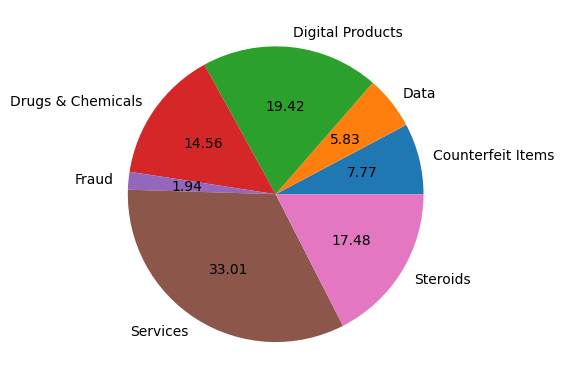

In [154]:
data.groupby('Market Category').size().plot(kind='pie', autopct='%.2f')
print(data['Market Category'].value_counts())


### Category Distribution

We have a high concentration of data points in the following categories: **Drugs & Chemicals, Steroids, Digital Products and Services**


Market Category
Counterfeit Items     8
Data                  6
Digital Products     20
Drugs & Chemicals    15
Fraud                 2
Services             34
Steroids             18
dtype: int64



<AxesSubplot: xlabel='Market Category'>

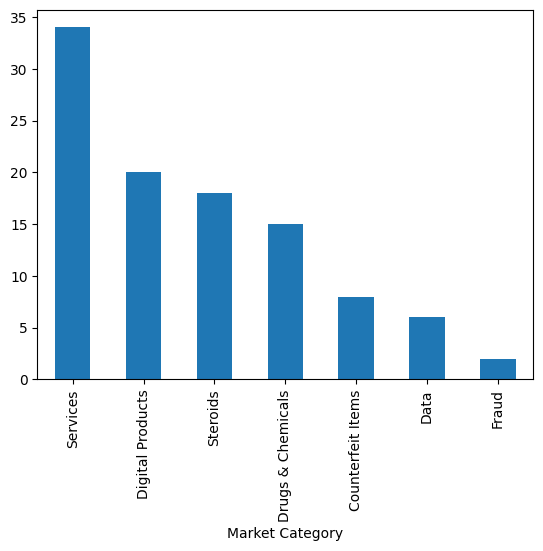

In [121]:
sr = data.groupby('Market Category').size()
print(sr)
sr.sort_values(ascending=False, inplace=True)
print()
sr.plot(kind='bar')

### Distribution of sales per seller

Below is an overview of the amount of sales we have per seller that we collected in the data

We have a total of 51 unique sellers in this dataset.


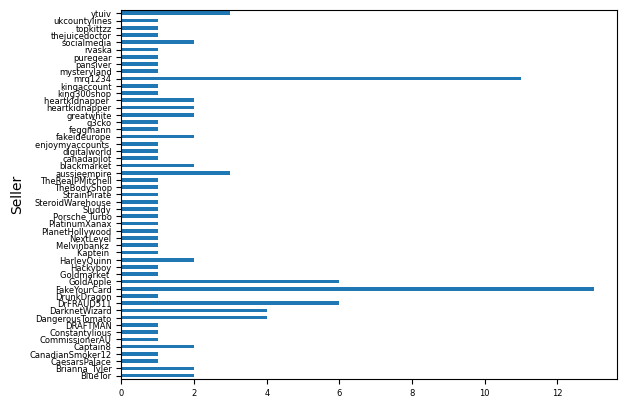

In [122]:
top_sellers = ['DangerousTomato', 'WeAreAMSTERDAM', 'expresspharma', 'heartkidnapper', 'RedLightLabs']


#Distinct Sellers

data.sort_values('Seller').groupby('Seller').size().plot(kind='barh', fontsize=6)

seller_count = len(data.groupby('Seller').size())

print(f"We have a total of {seller_count} unique sellers in this dataset.")


Number of sales per seller in category: Services


Seller
Brianna_Tyler       1
DRAFTMAN            1
DarknetWizard       4
DrFRAUD511          6
Goldmarket          1
Kaptein             1
Melvinbankz         1
Porsche Turbo       1
blackmarket         2
canadapilot         1
enjoymyaccounts     1
g3cko               1
heartkidnapper      2
heartkidnapper      1
kingaccount         1
mrq1234             7
socialmedia         2
dtype: int64

Word that - Occurances: 18


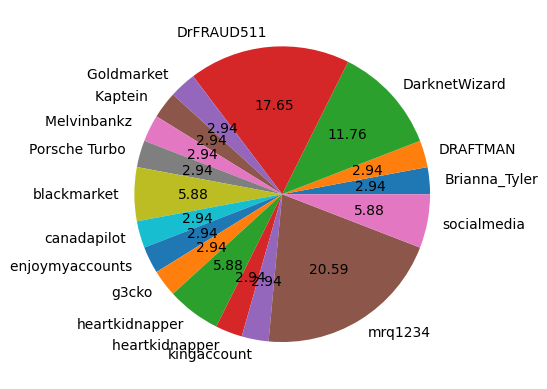

In [123]:
target = 'Services'
df = data[(data['Market Category'] == target)]
df.groupby('Seller').size().plot(kind='pie',  autopct='%.2f')
print(f"Number of sales per seller in category: {target}")
display(df.groupby('Seller').size())
count = dict(Counter(" ".join(df['Reason']).split()).most_common(10))
for item in count:
    if len(item) > 3:
        print(f"Word {item} - Occurances: {count[item]}")



### Seller Overview - Market Category: Data

Number of sales per seller in category: Data


Seller
GoldApple    6
dtype: int64

Word contains - Occurances: 4
Word This - Occurances: 3
Word personal - Occurances: 3
Word data - Occurances: 3
Word that - Occurances: 3
Word item - Occurances: 2
Word IDs, - Occurances: 2
Word Full - Occurances: 2
Word Names, - Occurances: 2


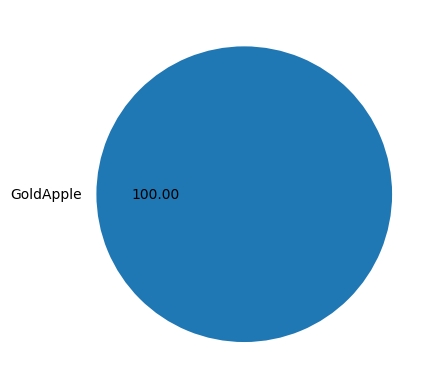

In [124]:
target = 'Data'
df = data[(data['Market Category'] == target)]
df.groupby('Seller').size().plot(kind='pie',  autopct='%.2f')
print(f"Number of sales per seller in category: {target}")
display(df.groupby('Seller').size())
count = dict(Counter(" ".join(df['Reason']).split()).most_common(10))
for item in count:
    if len(item) > 3:
        print(f"Word {item} - Occurances: {count[item]}")

### Seller Overview - Market Category: Fraud

Number of sales per seller in category: Fraud


Seller
CanadianSmoker12    1
mrq1234             1
dtype: int64

Word would - Occurances: 1
Word illegal - Occurances: 1
Word botnet - Occurances: 1
Word from - Occurances: 1
Word market - Occurances: 1


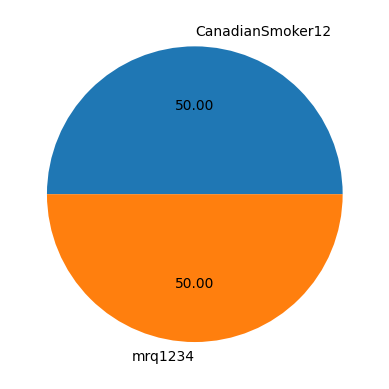

In [125]:
target = 'Fraud'
df = data[(data['Market Category'] == target)]
df.groupby('Seller').size().plot(kind='pie',  autopct='%.2f')
print(f"Number of sales per seller in category: {target}")
display(df.groupby('Seller').size())
count = dict(Counter(" ".join(df['Reason']).split()).most_common(10))
for item in count:
    if len(item) > 3:
        print(f"Word {item} - Occurances: {count[item]}")